In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.util import ngrams
import string
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Download NLTK stopwords
def download_stopwords():
    nltk.download('stopwords')

download_stopwords()
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PMLS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Sample data
documents = [
    "Natural Language Processing is a fascinating field of AI.",
    "Machine Learning and NLP are closely related.",
    "TF-IDF and N-Grams are essential techniques in NLP."
]


In [4]:
# Step 1: Preprocessing the text
preprocessed_documents = []
for doc in documents:
    # Convert to lowercase
    doc = doc.lower()
    
    # Remove punctuation
    doc = doc.translate(str.maketrans('', '', string.punctuation))
    
    # Remove stop words
    words = doc.split()
    filtered_words = [word for word in words if word not in stop_words]
    
    # Append preprocessed document
    preprocessed_documents.append(' '.join(filtered_words))

In [10]:
# Step 2: Bag of Words (BoW)
vectorizer_bow = CountVectorizer()
bow_matrix = vectorizer_bow.fit_transform(preprocessed_documents)
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer_bow.get_feature_names_out())
bow_df

,ai,closely,essential,fascinating,field,language,learning,machine,natural,ngrams,nlp,processing,related,techniques,tfidf
0,1,0,0,1,1,1,0,0,1,0,0,1,0,0,0
1,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0
2,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1


In [11]:
# Step 3: TF-IDF
vectorizer_tfidf = TfidfVectorizer()
tfidf_matrix = vectorizer_tfidf.fit_transform(preprocessed_documents)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer_tfidf.get_feature_names_out())
tfidf_df

,ai,closely,essential,fascinating,field,language,learning,machine,natural,ngrams,nlp,processing,related,techniques,tfidf
0,0.408248,0.000000,0.000000,0.408248,0.408248,0.408248,0.000000,0.000000,0.408248,0.000000,0.000000,0.408248,0.000000,0.000000,0.000000
1,0.000000,0.467351,0.000000,0.000000,0.000000,0.000000,0.467351,0.467351,0.000000,0.000000,0.355432,0.000000,0.467351,0.000000,0.000000
2,0.000000,0.000000,0.467351,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.467351,0.355432,0.000000,0.000000,0.467351,0.467351


In [12]:
# Step 4: N-Grams
bi_grams = []
tri_grams = []
for doc in preprocessed_documents:
    words = doc.split()
    bi_grams.append(list(ngrams(words, 2)))
    tri_grams.append(list(ngrams(words, 3)))


In [8]:
# Step 5: Display results
print("Preprocessed Documents:")
for i, doc in enumerate(preprocessed_documents):
    print(f"Document {i+1}: {doc}")

print("\nBag of Words (BoW) Matrix:")
print(bow_df)

print("\nTF-IDF Matrix:")
print(tfidf_df)

print("\nBi-Grams:")
for i, bi in enumerate(bi_grams):
    print(f"Document {i+1} Bi-Grams: {bi}")

print("\nTri-Grams:")
for i, tri in enumerate(tri_grams):
    print(f"Document {i+1} Tri-Grams: {tri}")

Preprocessed Documents:
Document 1: natural language processing fascinating field ai
Document 2: machine learning nlp closely related
Document 3: tfidf ngrams essential techniques nlp

Bag of Words (BoW) Matrix:
   ai  closely  essential  fascinating  field  language  learning  machine  \
0   1        0          0            1      1         1         0        0   
1   0        1          0            0      0         0         1        1   
2   0        0          1            0      0         0         0        0   

   natural  ngrams  nlp  processing  related  techniques  tfidf  
0        1       0    0           1        0           0      0  
1        0       0    1           0        1           0      0  
2        0       1    1           0        0           1      1  

TF-IDF Matrix:
         ai   closely  essential  fascinating     field  language  learning  \
0  0.408248  0.000000   0.000000     0.408248  0.408248  0.408248  0.000000   
1  0.000000  0.467351   0.000000     

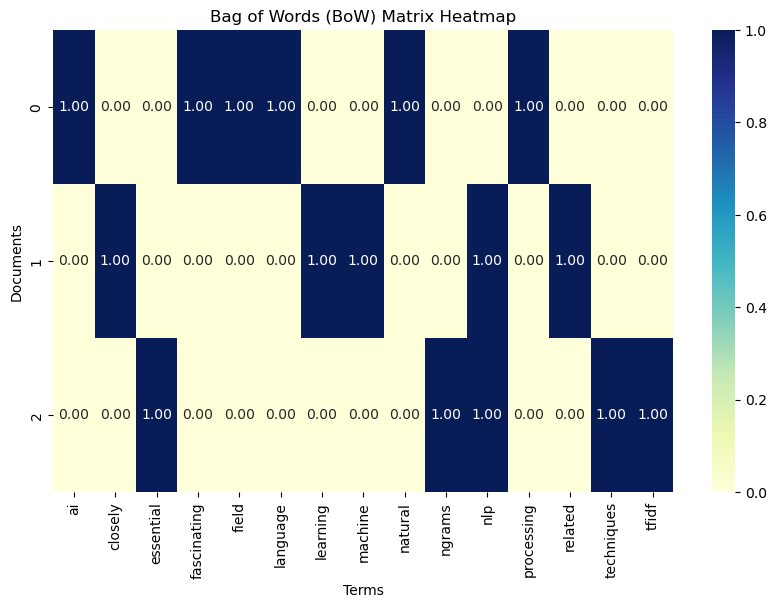

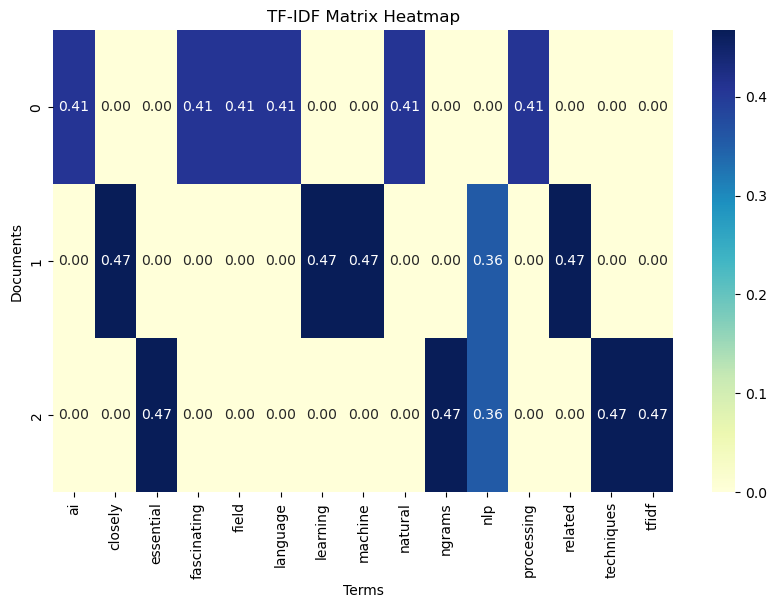

In [9]:
# Step 6: Visualization of BoW and TF-IDF Matrices
def plot_matrix(matrix_df, title):
    plt.figure(figsize=(10, 6))
    sns.heatmap(matrix_df, annot=True, cmap='YlGnBu', fmt=".2f", cbar=True)
    plt.title(title)
    plt.xlabel('Terms')
    plt.ylabel('Documents')
    plt.show()

plot_matrix(bow_df, 'Bag of Words (BoW) Matrix Heatmap')
plot_matrix(tfidf_df, 'TF-IDF Matrix Heatmap')